In [1]:
import pandas as pd
import numpy as np
import scipy as sp

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import LeaveOneOut
from sklearn.cross_validation import KFold

from __future__ import division
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib

import collections
from collections import Counter
from textblob import TextBlob


/Users/abhi/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#load the data set
train = pd.read_csv("/Users/abhi/Downloads/pro/output/final_train.csv")
test = pd.read_csv("/Users/abhi/Downloads/pro/output/test.csv")
train = train.drop('nouns',1)
test.head(2)

,Unnamed: 0,subjectivity,polarity,p_pos,p_neg,sentiment,word_count,nouns
0,0,0.000000,0.000000,0.127052,0.872948,neg,14,0
1,1,0.066667,-0.166667,0.719174,0.280826,pos,23,2


In [3]:
#Load the data set with noun count
train_nouned = pd.read_csv("/Users/abhi/Downloads/pro/output/train_nouned.csv")
test_nouned = pd.read_csv("/Users/abhi/Downloads/pro/output/test_nouned.csv")


In [4]:
x = train_nouned["nouns"]
y = test_nouned["nouns"]
train_nouns = x
test_nouns  = y

#column binding nouns to the original data set
train1 = pd.concat([train, train_nouns], axis=1)
test1 = pd.concat([test, test_nouns], axis=1)
train = train1
test = test1

In [5]:
#Dropping unwanted columns in training set
train = train.drop('X.bcc',1)
train = train.drop('X.cc',1)
train = train.drop('X.To',1)
train = train.drop('X.From',1)
train = train.drop('Date',1)
train = train.drop('X.1',1)
train = train.drop('X',1)
train = train.drop('Message.ID',1)
train = train.drop('content',1)
train = train.drop('Subject',1)
train = train.drop('From',1)
train = train.drop('To',1)
train = train.drop('verbs',1)
train = train.drop('adverbs',1)
train = train.drop('adj',1)
train = train.drop('Unnamed: 0',1)
train = train.drop('index',1)

In [6]:
#Dropping unwanted columns in the test set
#test = test.drop('X.bcc',1)
#test = test.drop('X.cc',1)
#test = test.drop('X.To',1)
#test = test.drop('X.From',1)
#test = test.drop('Date',1)
#test = test.drop('X.1',1)
#test = test.drop('X',1)
#test = test.drop('Message.ID',1)
#test = test.drop('content',1)
#test = test.drop('Subject',1)
#test = test.drop('From',1)
#test = test.drop('To',1)
test = test.drop('Unnamed: 0',1)
#test = test.drop('index',1)

In [7]:
# create the output variable Fraud in the test set

train['Fraud'] = ""
train.Fraud[0:9987] = 0
train.Fraud[9987:10000] = 1

#Converting the categorical variables to factors
train.sentiment = pd.factorize(train["sentiment"])[0]
test.sentiment = pd.factorize(test["sentiment"])[0]

train.Fraud = pd.factorize(train["Fraud"])[0]

#test['Fraud'] = ""
#test.Fraud[0:9974] = 0
#test.Fraud[9974:10000] = 1
#test.Fraud = pd.factorize(test["Fraud"])[0]

/Users/abhi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/abhi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/abhi/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [8]:
#resampling the fradulent values in training 
train_o1 = train.iloc[9987:10000,:]
train_o2 = train.iloc[9987:10000,:]
train_o3 = pd.concat([train_o1,train_o2])
train_o4 = pd.concat([train_o3,train_o3])
train_o5 = pd.concat([train_o4,train_o4])
train_o6 = pd.concat([train_o5,train_o5])
train_o7 = pd.concat([train_o6,train_o6])
train_o8 = pd.concat([train_o7,train_o7])
train_o9 = pd.concat([train_o8,train_o8])
train_10 = pd.concat([train_o9,train_o9])
train_11 = pd.concat([train_10,train_10])

#joining the fraud values to the training set and randomizing the data set
train = pd.concat([train,train_11])
train = train.iloc[np.random.permutation(len(train))]

In [9]:
xtrain = train.iloc[0:10000,0:7]
ytrain = train.iloc[0:10000,7]
xtest = train.iloc[10000:16656,0:7]
ytest = train.iloc[10000:16656,7]


In [10]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm
import pandas as pd

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

In [ ]:
#support vector machine
clf = svm.SVC(kernel='linear', C=1).fit(xtrain, ytrain)
clf.score(xtest, ytest) 

In [ ]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, train.iloc[:,1:6],train.iloc[:,6], cv=5)

In [ ]:
scores

In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

In [ ]:
predicted = cross_val_predict(clf, train.iloc[:,1:6],train.iloc[:,6], cv=50)
 

# KNN MODEL

In [11]:
clf5 = KNeighborsClassifier(2)
clf5.fit(xtrain, ytrain)
ypred = clf5.predict(xtest)
conf = confusion_matrix(ytest, ypred)
TP=conf[0,0]
FN=conf[0,1]
FP=conf[1,0]
TN=conf[1,1]

#calculating accuracy precision and recall
acc=(TP+TN)/(TP+TN+FP+FN)
prec=TP/(TP+FP)
rec=TP/(TP+FN)

In [12]:
conf

array([[3942,   10],
       [   0, 2704]])

# RANDOM FOREST

In [13]:
#Random forest
from sklearn.ensemble import RandomForestClassifier 
forest = RandomForestClassifier(n_estimators = 1)
forest = forest.fit(xtrain,ytrain)
output = forest.predict(xtrain)
conf = confusion_matrix(ytest, ypred)
TP=conf[0,0]
FN=conf[0,1]
FP=conf[1,0]
TN=conf[1,1]
acc=(TP+TN)/(TP+TN+FP+FN)
prec=TP/(TP+FP)
rec=TP/(TP+FN)

In [14]:
conf

array([[3942,   10],
       [   0, 2704]])

# LOGISTIC REGRESSION

In [15]:
clf3 = LogisticRegression()
clf3.fit(xtrain, ytrain)
ypred = clf3.predict(xtest)
conf = confusion_matrix(ytest, ypred)
TP=conf[0,0]
FN=conf[0,1]
FP=conf[1,0]
TN=conf[1,1]
acc=(TP+TN)/(TP+TN+FP+FN)
prec=TP/(TP+FP)
rec=TP/(TP+FN)

In [16]:
conf

array([[3180,  772],
       [1295, 1409]])

# DECISION TREES

In [17]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(xtrain, ytrain)
ypred = clf.predict(xtest)
conf = confusion_matrix(ytest, ypred)
TP=conf[0,0]
FN=conf[0,1]
FP=conf[1,0]
TN=conf[1,1]
acc=(TP+TN)/(TP+TN+FP+FN)
prec=TP/(TP+FP)
rec=TP/(TP+FN)

In [18]:
conf

array([[3945,    7],
       [   0, 2704]])

# PLOTS

### Histogram of Fraud E-mails

/Users/abhi/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1288: UserWarning: findfont: Font family [u'calibri'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))


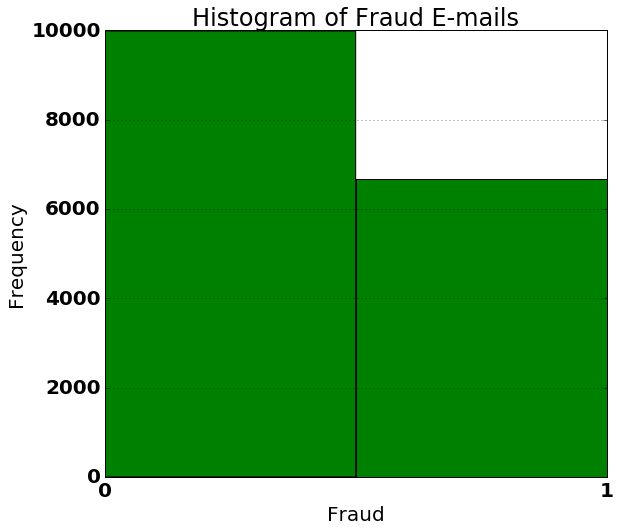

In [19]:
font = {'family' : 'calibri',
        'weight' : 'bold',
        'size'   : 20}
matplotlib.rc('font', **font)
plt.figure(figsize=(9,8))
plt.hist(train['Fraud'], bins = 2, color = "green")
xlab = 'Fraud'
ylab = 'Frequency'
title = 'Histogram of Fraud E-mails'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
tick_val = [0,1]
plt.grid(True)
plt.xticks(tick_val)
plt.show()

### Scatter plot of Subjectivity vs Fraud

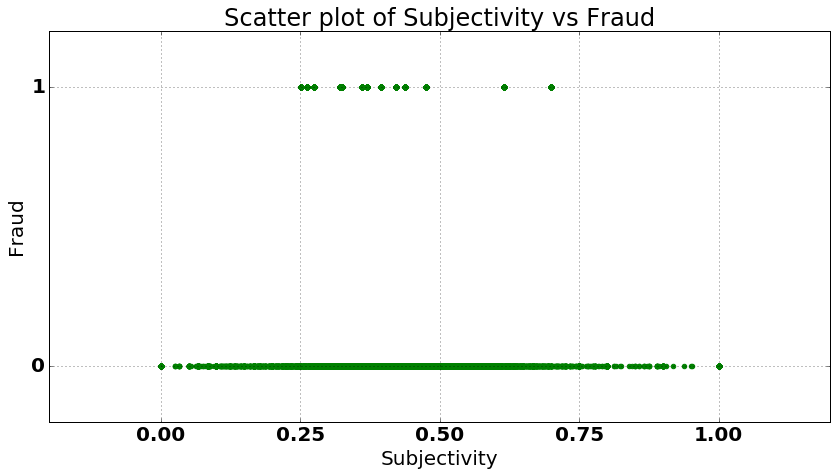

In [20]:
font = {'family' : 'calibri',
        'weight' : 'bold',
        'size'   : 20}
matplotlib.rc('font', **font)
plt.figure(figsize=(14,7))
plt.scatter(train['subjectivity'], train['Fraud'],color = "green")
xlab = 'Subjectivity'
ylab = 'Fraud'
title = 'Scatter plot of Subjectivity vs Fraud'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
tick_val1 = [0,0.25,0.5,0.75,1]
tick_val2 = [0,1]
plt.xticks(tick_val1)
plt.yticks(tick_val2)
plt.grid(True)
plt.show()


### Scatter plot of Polarity vs Fraud

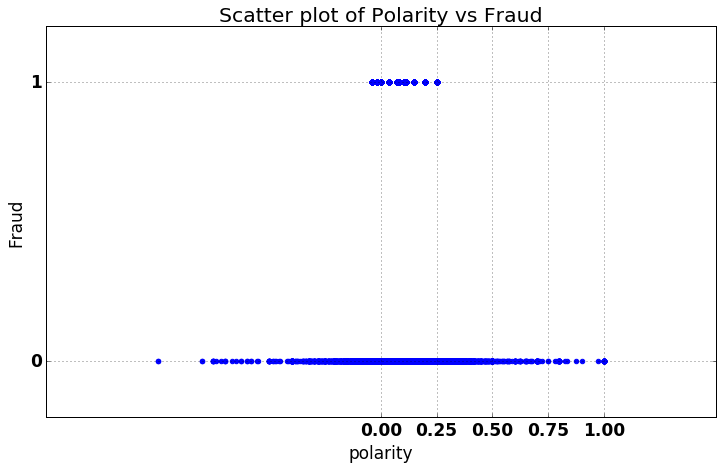

In [21]:
font = {'family' : 'calibri',
        'weight' : 'bold',
        'size'   : 17}
matplotlib.rc('font', **font)
plt.figure(figsize=(12,7))
plt.scatter(train['polarity'], train['Fraud'],color = "blue")
xlab = 'polarity'
ylab = 'Fraud'
title = 'Scatter plot of Polarity vs Fraud'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
tick_val1 = [0,0.25,0.5,0.75,1]
tick_val2 = [0,1]
plt.xticks(tick_val1)
plt.yticks(tick_val2)
plt.grid(True)
plt.show()

### Scatter plot of p_pos vs Fraud

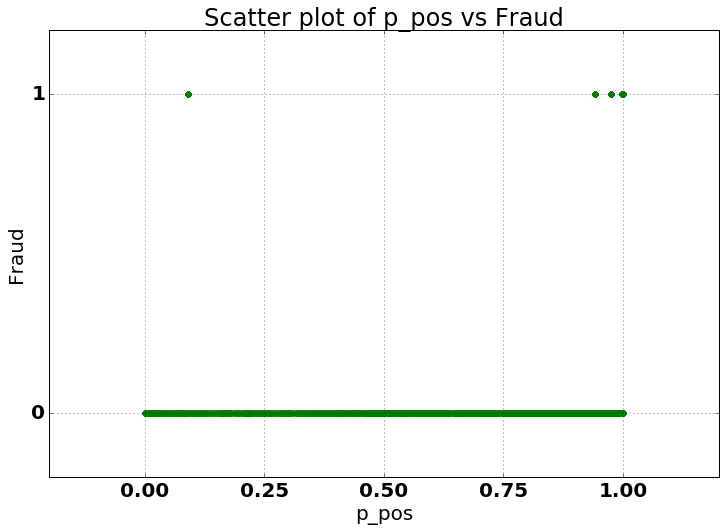

In [22]:
font = {'family' : 'calibri',
        'weight' : 'bold',
        'size'   : 20}
matplotlib.rc('font', **font)
plt.figure(figsize=(12,8))
plt.scatter(train['p_pos'], train['Fraud'],color = "green")
xlab = 'p_pos'
ylab = 'Fraud'
title = 'Scatter plot of p_pos vs Fraud'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
tick_val1 = [0,0.25,0.5,0.75,1]
tick_val2 = [0,1]
plt.xticks(tick_val1)
plt.yticks(tick_val2)
plt.grid(True)
plt.show()

### Scatter plot of p_neg vs Fraud

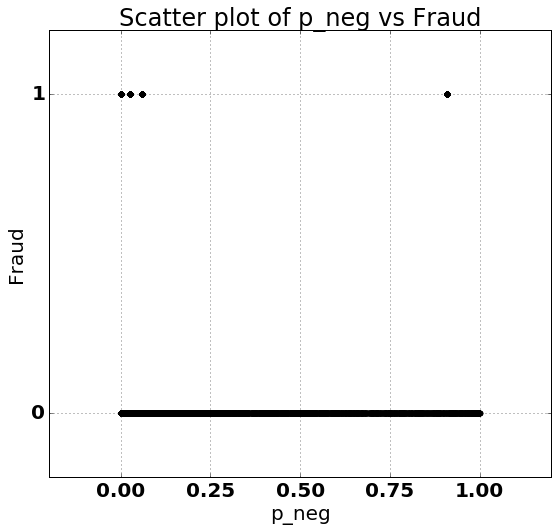

In [23]:
font = {'family' : 'calibri',
        'weight' : 'bold',
        'size'   : 20}
matplotlib.rc('font', **font)
plt.figure(figsize=(9,8))
plt.scatter(train['p_neg'], train['Fraud'],color = "black")
xlab = 'p_neg'
ylab = 'Fraud'
title = 'Scatter plot of p_neg vs Fraud'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
tick_val1 = [0,0.25,0.5,0.75,1]
tick_val2 = [0,1]
plt.xticks(tick_val1)
plt.yticks(tick_val2)
plt.grid(True)
plt.show()

### Histogram of Sentiment

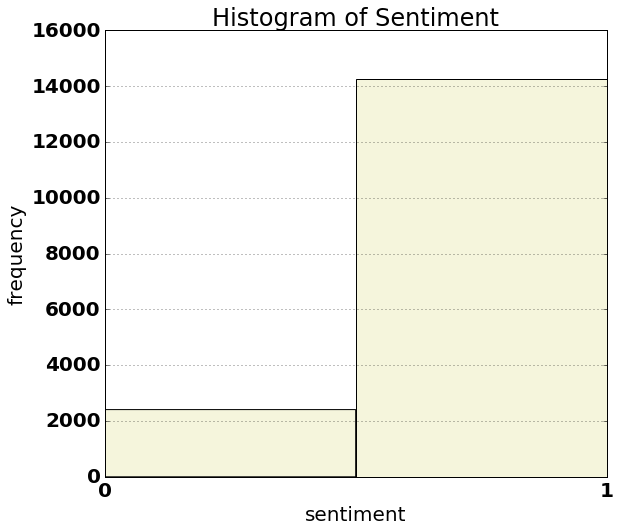

In [24]:
font = {'family' : 'calibri',
        'weight' : 'bold',
        'size'   : 20}
matplotlib.rc('font', **font)
plt.figure(figsize=(9,8))
plt.hist(train['sentiment'],bins = 2,color = "beige")
xlab = 'sentiment'
ylab = 'frequency'
title = 'Histogram of Sentiment'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
tick_val1 = [0,1]
plt.xticks(tick_val1)
plt.grid(True)
plt.show()

### Histogram of word_count

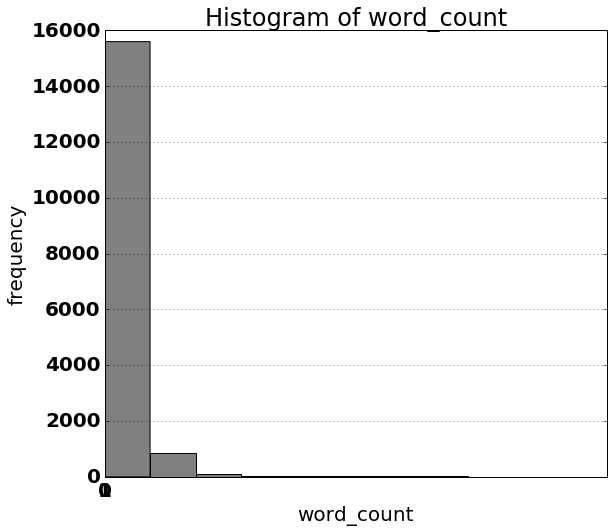

In [25]:
font = {'family' : 'calibri',
        'weight' : 'bold',
        'size'   : 20}
matplotlib.rc('font', **font)
plt.figure(figsize=(9,8))
plt.hist(train['word_count'],bins = 10,color = "grey")
xlab = 'word_count'
ylab = 'frequency'
title = 'Histogram of word_count'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
tick_val1 = [0,1]
plt.xticks(tick_val1)
plt.grid(True)
plt.show()

### Histogram of nouns

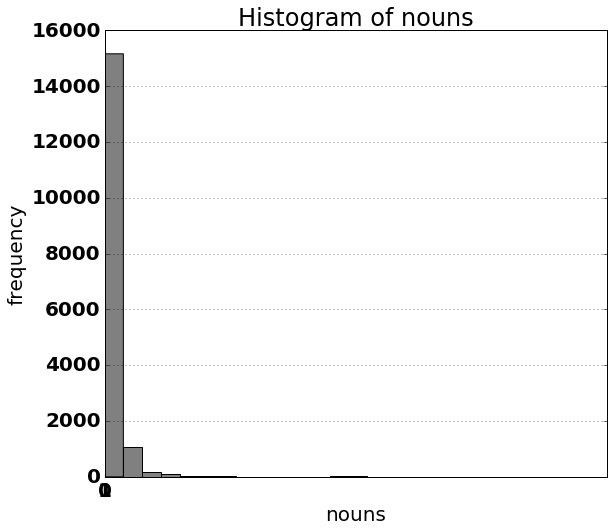

In [26]:
font = {'family' : 'calibri',
        'weight' : 'bold',
        'size'   : 20}
matplotlib.rc('font', **font)
plt.figure(figsize=(9,8))
plt.hist(train['nouns'],bins = 25,color = "grey")
xlab = 'nouns'
ylab = 'frequency'
title = 'Histogram of nouns'
plt.xlabel(xlab)
plt.ylabel(ylab)
plt.title(title)
tick_val1 = [0,1]
plt.xticks(tick_val1)
plt.grid(True)
plt.show()